In [7]:


import numpy as np # linear algebra
import pandas as pd # data processing



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [8]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import*
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from xgboost import XGBClassifier
from xgboost import XGBRegressor



In [9]:
df = pd.read_csv('Sleep_Efficiency.csv')

In [10]:
df['Gender']=df['Gender'].map({'Male':0, 'Female':1})

In [12]:
df=df.drop(['Bedtime','Wakeup time'], axis=1)

KeyError: "['Bedtime' 'Wakeup time'] not found in axis"

In [13]:
df.count()

ID                        452
Age                       452
Gender                    452
Sleep duration            452
Sleep efficiency          452
REM sleep percentage      452
Deep sleep percentage     452
Light sleep percentage    452
Awakenings                432
Caffeine consumption      427
Alcohol consumption       438
Smoking status            452
Exercise frequency        446
dtype: int64

In [14]:
df['Awakenings'].value_counts()
df['Caffeine consumption'].value_counts()
df['Alcohol consumption'].value_counts()
df['Exercise frequency'].value_counts()

3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: Exercise frequency, dtype: int64

In [15]:
df['Awakenings']=df['Awakenings'].fillna('1.0')
df['Caffeine consumption']=df['Caffeine consumption'].fillna('0.0')
df['Alcohol consumption']=df['Alcohol consumption'].fillna('0.0')
df['Exercise frequency']=df['Exercise frequency'].fillna('3.0')

In [16]:
df.head()

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,1,6.0,0.88,18,70,12,0,0,0,Yes,3
1,2,69,0,7.0,0.66,19,28,53,3,0,3,Yes,3
2,3,40,1,8.0,0.89,20,70,10,1,0,0,No,3
3,4,40,1,6.0,0.51,23,25,52,3,50,5,Yes,1
4,5,57,0,8.0,0.76,27,55,18,3,0,3,No,3


In [17]:

# Use map to replace "Yes" with 1 and "No" with 0
df["Smoking status"] = df["Smoking status"].map({'Yes': 1, 'No': 0})


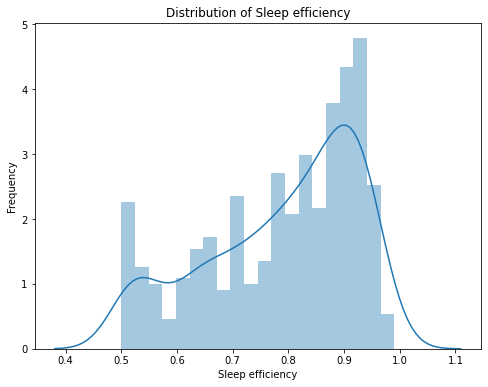

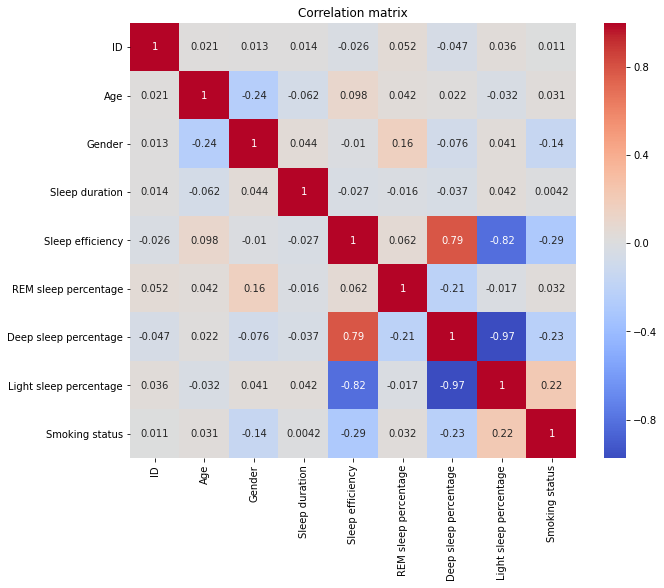

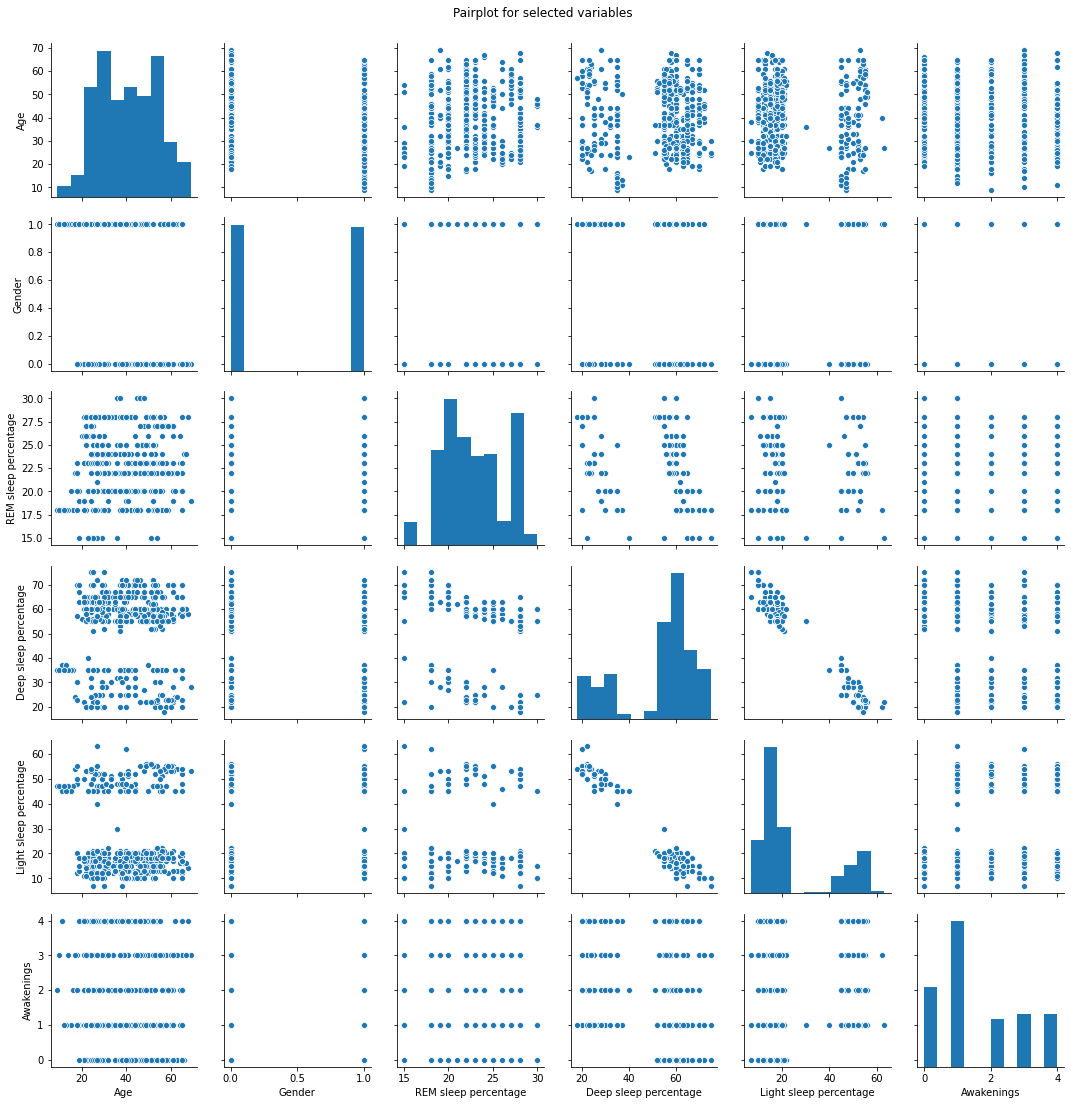

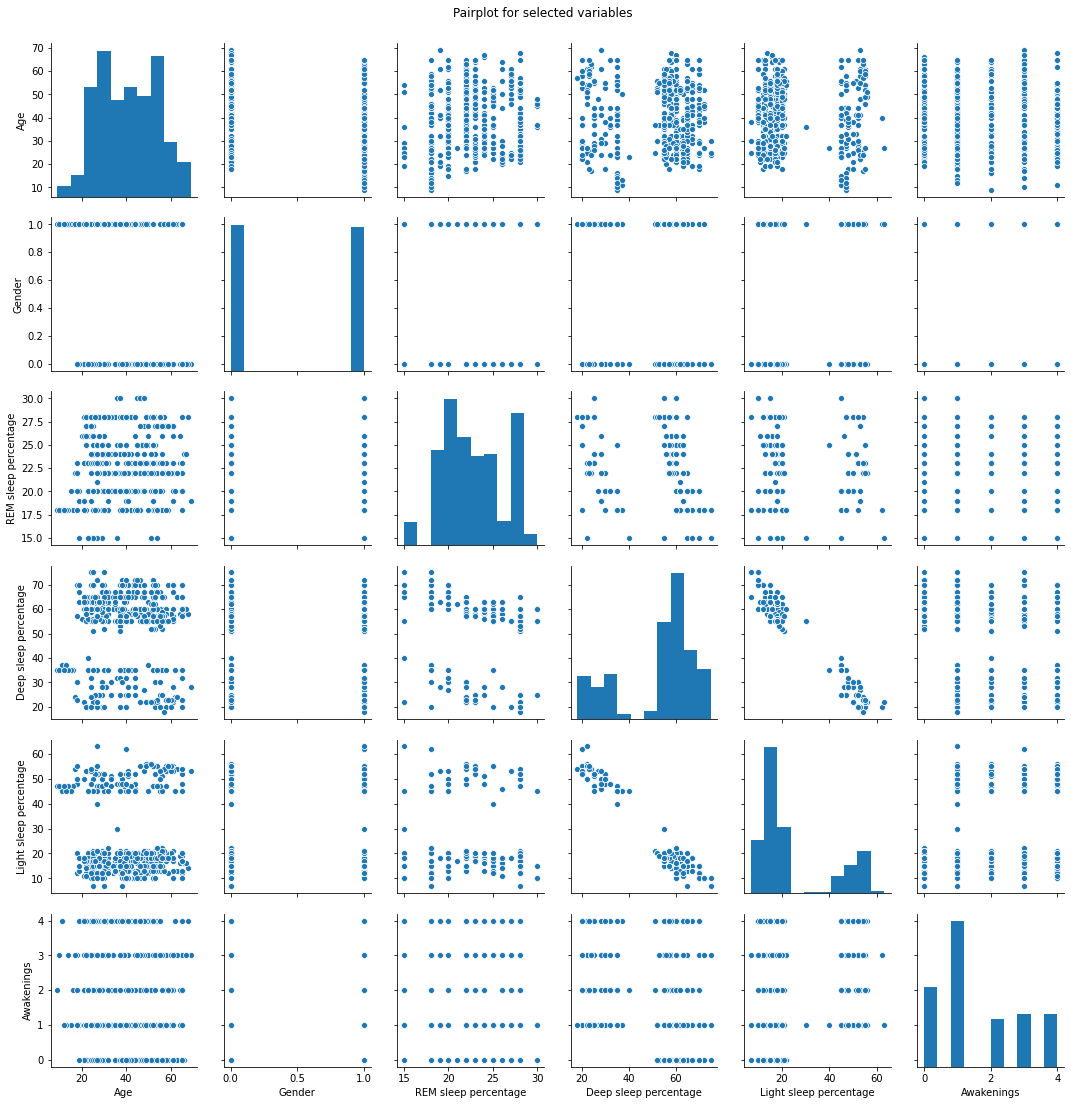

In [18]:
summary = df.describe()

# Distribution of the  variable cible "Sleep efficiency"
plt.figure(figsize=(8, 6))
sns.distplot(df["Sleep efficiency"], kde=True, bins=20)

plt.title("Distribution of Sleep efficiency")
plt.xlabel("Sleep efficiency")
plt.ylabel("Frequency")
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

# Pairplot for selected variables
selected_features = ["Age", "Gender", "REM sleep percentage", "Deep sleep percentage", "Light sleep percentage", "Awakenings"]

selected_df = df[selected_features]
#
selected_df = df[selected_features].dropna()

#  Ensure Numeric Types
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Plotting
sns.pairplot(selected_df)
plt.suptitle("Pairplot for selected variables", y=1.02)
plt.show()
#
sns.pairplot(selected_df)
plt.suptitle("Pairplot for selected variables", y=1.02)
plt.show()


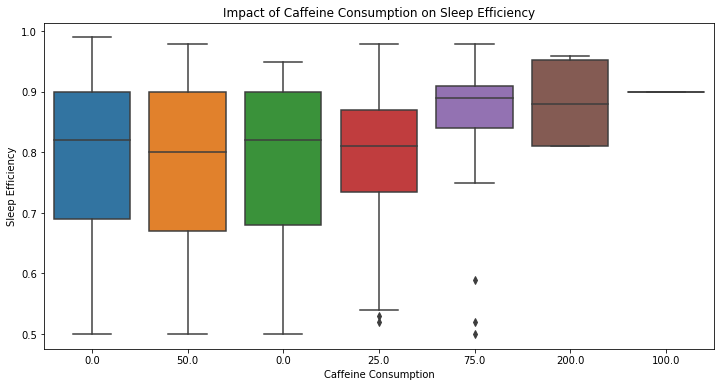

In [19]:
# The impact of caffeine consumption on sleep efficiency
plt.figure(figsize=(12, 6))
sns.boxplot(x='Caffeine consumption', y='Sleep efficiency', data=df)
plt.title('Impact of Caffeine Consumption on Sleep Efficiency')
plt.xlabel('Caffeine Consumption')
plt.ylabel('Sleep Efficiency')
plt.show()


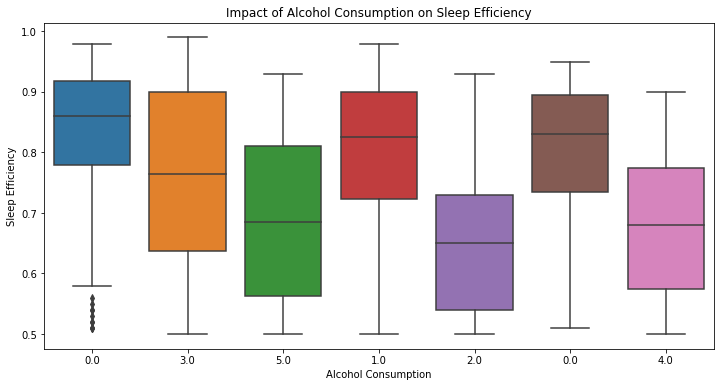

In [20]:
# The impact of alcohol consumption on sleep efficiency
plt.figure(figsize=(12, 6))
sns.boxplot(x='Alcohol consumption', y='Sleep efficiency', data=df)
plt.title('Impact of Alcohol Consumption on Sleep Efficiency')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Sleep Efficiency')
plt.show()


In [21]:
# Statistical analysis
caffeine_stats = df.groupby('Caffeine consumption')['Sleep efficiency'].describe()
alcohol_stats = df.groupby('Alcohol consumption')['Sleep efficiency'].describe()

# Print statistical summaries
print("Caffeine Consumption Statistics:")
print(caffeine_stats)

print("\nAlcohol Consumption Statistics:")
print(alcohol_stats)

Caffeine Consumption Statistics:
                      count      mean       std   min    25%   50%     75%  \
Caffeine consumption                                                         
0.0                   211.0  0.786209  0.137449  0.50  0.690  0.82  0.9000   
25.0                   79.0  0.799114  0.114815  0.52  0.735  0.81  0.8700   
50.0                  107.0  0.771589  0.143508  0.50  0.670  0.80  0.9000   
75.0                   25.0  0.845600  0.127413  0.50  0.840  0.89  0.9100   
100.0                   1.0  0.900000       NaN  0.90  0.900  0.90  0.9000   
200.0                   4.0  0.882500  0.083815  0.81  0.810  0.88  0.9525   
0.0                    25.0  0.777600  0.142340  0.50  0.680  0.82  0.9000   

                       max  
Caffeine consumption        
0.0                   0.99  
25.0                  0.98  
50.0                  0.98  
75.0                  0.98  
100.0                 0.90  
200.0                 0.96  
0.0                   0.95  

Al

In [22]:
X = df[["Age", "Gender", "REM sleep percentage", "Deep sleep percentage", "Light sleep percentage", "Awakenings"]]
y = df["Sleep efficiency"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)

MSE: 0.004609561225531814
R2: 0.7524145976575571


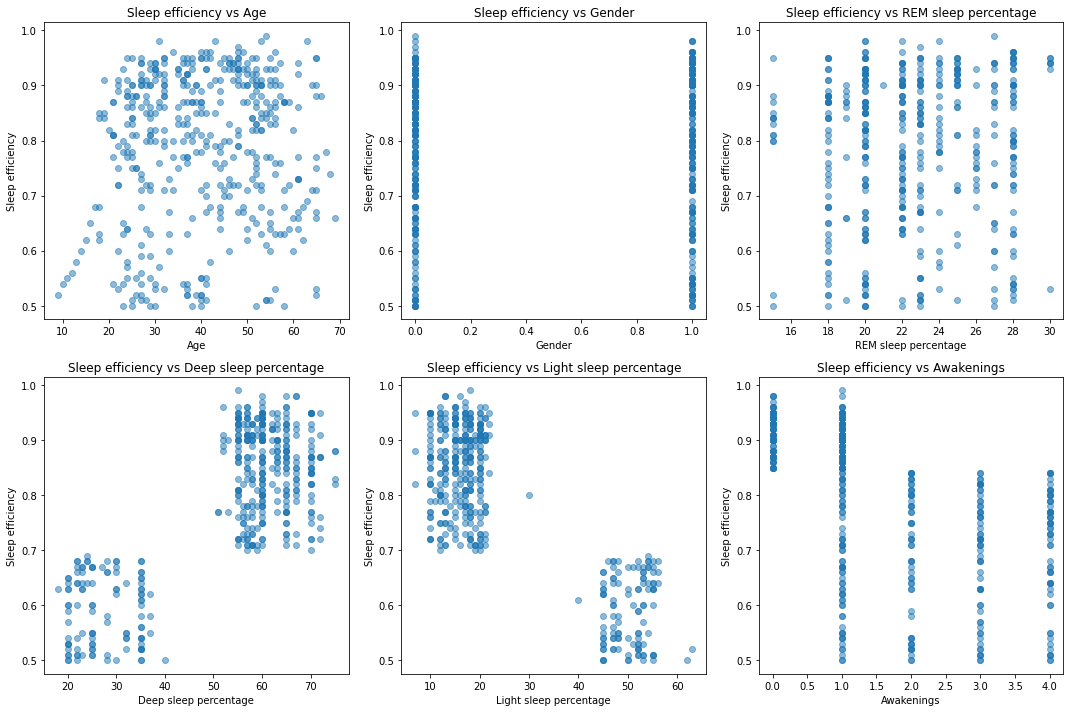

In [23]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(["Age", "Gender", "REM sleep percentage", "Deep sleep percentage", "Light sleep percentage", "Awakenings"]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[feature], df["Sleep efficiency"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Sleep efficiency")
    plt.title(f"Sleep efficiency vs {feature}")

plt.tight_layout()
plt.show()

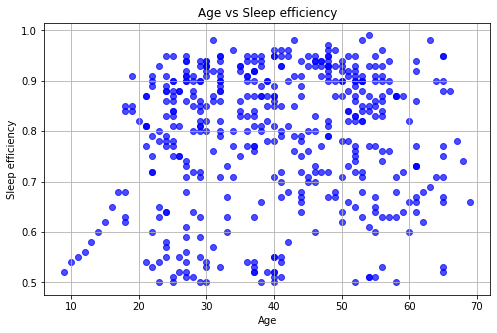

In [24]:
# Plotting Age vs Sleep Efficiency
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Sleep efficiency'], color='blue', alpha=0.7)
plt.title('Age vs Sleep efficiency')
plt.xlabel('Age')
plt.ylabel('Sleep efficiency')
plt.grid(True)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_folds = 5

linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
random_forest_reg = RandomForestRegressor()

linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

y_hat_linear = linear_reg.predict(X_test)
y_hat_ridge = ridge_reg.predict(X_test)
y_hat_lasso = lasso_reg.predict(X_test)
y_hat_rf = random_forest_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_hat_linear)
r2_linear = r2_score(y_test, y_hat_linear)

scores1 = cross_val_score(linear_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores1=-scores1
mean_mse1 = mse_scores1.mean()
std_mse1 = mse_scores1.std()

#accuracy1 = accuracy_score(y_test, y_hat_linear)

mse_ridge = mean_squared_error(y_test, y_hat_ridge)
r2_ridge = r2_score(y_test, y_hat_ridge)

scores2 = cross_val_score(ridge_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores2=-scores2
mean_mse2 = mse_scores2.mean()
std_mse2 = mse_scores2.std()

#accuracy2 = accuracy_score(y_test, y_hat_ridge)

mse_lasso = mean_squared_error(y_test, y_hat_lasso)
r2_lasso = r2_score(y_test, y_hat_lasso)

scores3 = cross_val_score(lasso_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores3=-scores3
mean_mse3 = mse_scores3.mean()
std_mse3 = mse_scores3.std()

#accuracy3 = accuracy_score(y_test, y_hat_lasso)

mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf = r2_score(y_test, y_hat_rf)

scores4 = cross_val_score(random_forest_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores4=-scores4
mean_mse4 = mse_scores4.mean()
std_mse4 = mse_scores4.std()

#accuracy4 = accuracy_score(y_test, y_hat_rf)

print("Linear Regression - MSE:", mse_linear, "R2:", r2_linear, "\n", "Cross-validation score:", mse_scores1, f"Mean MSE: {mean_mse1:.4f}, Standard Deviation MSE: {std_mse1:.4f}")
print("Ridge Regression - MSE:", mse_ridge, "R2:", r2_ridge, "\n", "Cross-validation score:", mse_scores2, f"Mean MSE: {mean_mse2:.4f}, Standard Deviation MSE: {std_mse2:.4f}")
print("Lasso Regression - MSE:", mse_lasso, "R2:", r2_lasso, "\n", "Cross-validation score:", mse_scores3, f"Mean MSE: {mean_mse3:.4f}, Standard Deviation MSE: {std_mse3:.4f}")
print("Random Forest - MSE:", mse_rf, "R2:", r2_rf, "\n", "Cross-validation score:", mse_scores4, f"Mean MSE: {mean_mse4:.4f}, Standard Deviation MSE: {std_mse4:.4f}")


Linear Regression - MSE: 0.004609561225531814 R2: 0.7524145976575571 
 Cross-validation score: [0.0039574  0.00386919 0.00433592 0.00462454 0.00391438] Mean MSE: 0.0041, Standard Deviation MSE: 0.0003
Ridge Regression - MSE: 0.00460844104249106 R2: 0.7524747641148993 
 Cross-validation score: [0.00395626 0.00387    0.00433731 0.00462305 0.00391361] Mean MSE: 0.0041, Standard Deviation MSE: 0.0003
Lasso Regression - MSE: 0.010649058070727205 R2: 0.4280255325809562 
 Cross-validation score: [0.00951348 0.01121858 0.01012099 0.01124778 0.00955147] Mean MSE: 0.0103, Standard Deviation MSE: 0.0008
Random Forest - MSE: 0.003274990903316654 R2: 0.8240960688461305 
 Cross-validation score: [0.0026193  0.00386663 0.0034231  0.00373896 0.00360574] Mean MSE: 0.0035, Standard Deviation MSE: 0.0004


In [ ]:
#

In [26]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

y_hat_poly = poly_reg.predict(poly.transform(X_test))
mse_poly = mean_squared_error(y_test, y_hat_poly)
r2_poly = r2_score(y_test, y_hat_poly)

# Neural Networks
nn_reg = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
nn_reg.fit(X_train, y_train)

y_hat_nn = nn_reg.predict(X_test)
mse_nn = mean_squared_error(y_test, y_hat_nn)
r2_nn = r2_score(y_test, y_hat_nn)

# Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

y_hat_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_hat_gb)
r2_gb = r2_score(y_test, y_hat_gb)

print("Polynomial Regression - MSE:", mse_poly, "R2:", r2_poly, "\n")
print("Neural Networks - MSE:", mse_nn, "R2:", r2_nn, "\n")
print("Gradient Boosting - MSE:", mse_gb, "R2:", r2_gb, "\n")


Polynomial Regression - MSE: 0.004329729278668569 R2: 0.7674447278071815 

Neural Networks - MSE: 0.008524717645294813 R2: 0.5421265615530391 

Gradient Boosting - MSE: 0.0027599293389930202 R2: 0.8517606812452169 



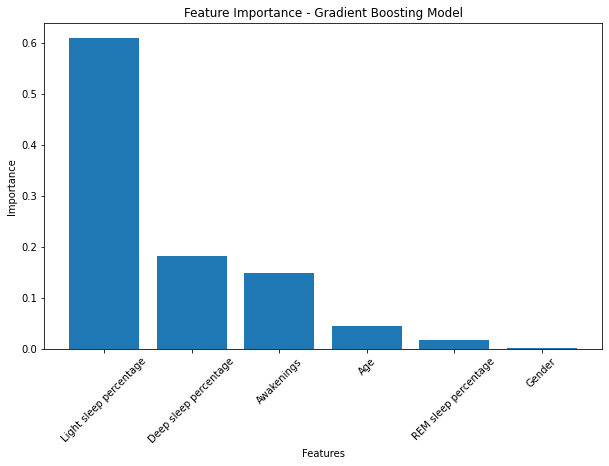

In [27]:
feature_importance = gb_reg.feature_importances_

feature_names = X.columns

# Sorting features by descending order of importance
sorted_idx = feature_importance.argsort()[::-1]

# Bar chart to visualize the importance of features
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Gradient Boosting Model")
plt.show()

